<a href="https://colab.research.google.com/github/DomenicoArmillotta/MSC_thesis-Uml_quality_assessment_with_ML/blob/main/Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab import drive
from matplotlib import pyplot as plt


In [ ]:
# setup directory used in the project for training and test phase
drive.mount('/content/drive')
#data_dir = '/content/drive/MyDrive/UML'


MessageError: ignored

In [ ]:
img = cv2.imread('/content/drive/MyDrive/UML/class2.png')


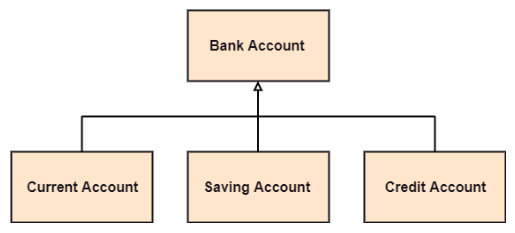

In [ ]:
#show image
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # Rimuove gli assi dell'immagine
plt.show()


# Faster-RCNN

In [ ]:
!pip install detecto

In [ ]:
import cv2
from google.colab import drive
from matplotlib import pyplot as plt
from detecto import core, visualize, utils
from detecto.core import Dataset, DataLoader

In [ ]:
# setup directory used in the project for training and test phase
drive.mount('/content/drive')
train = core.Dataset('/content/drive/My Drive/dataset_label/train')
test = Dataset('/content/drive/My Drive/dataset_label/train')


Mounted at /content/drive


It looks like you're training your model on a CPU. Consider switching to a GPU; otherwise, this method can take hours upon hours or even days to finish. For more information, see https://detecto.readthedocs.io/en/latest/usage/quickstart.html#technical-requirements
Epoch 1 of 3
Begin iterating over training dataset


100%|██████████| 4/4 [03:45<00:00, 56.26s/it]


Epoch 2 of 3
Begin iterating over training dataset


100%|██████████| 4/4 [03:48<00:00, 57.11s/it]


Epoch 3 of 3
Begin iterating over training dataset


100%|██████████| 4/4 [03:07<00:00, 46.82s/it]


ValueError: ignored

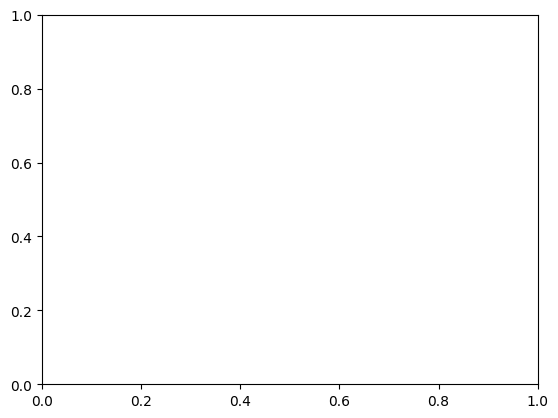

In [ ]:
loader = core.DataLoader(train, batch_size= 2, shuffle= True)
# label '0' always represents the background class
labels_map = { 'class': 1,
 'arrow': 2,
 'line': 2,
 'cross': 2
    }

model = core.Model([*labels_map.keys()])


#model.fit(loader, verbose= True)
losses = model.fit(loader, epochs= 3, learning_rate= 0.001, verbose= True)
model.save("uml_weights.pth")
uml_model = model.get_internal_model()
print(type(uml_model))



In [ ]:
model.save("uml_weights.pth")
uml_model = model.get_internal_model()
print(type(uml_model))

<class 'torchvision.models.detection.faster_rcnn.FasterRCNN'>


Image Shape:  (261, 500, 3)
Initial predictions, w/o supression of overlapping bbox and accuracy filter
Total number of preictions:  100 



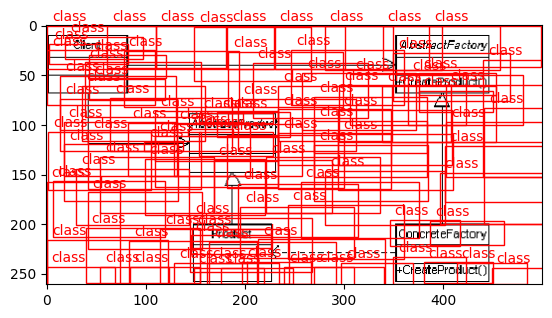




Filtered predictions after threshodling, i.e, accuracy > 0.25.
Total number of preictions:  15 



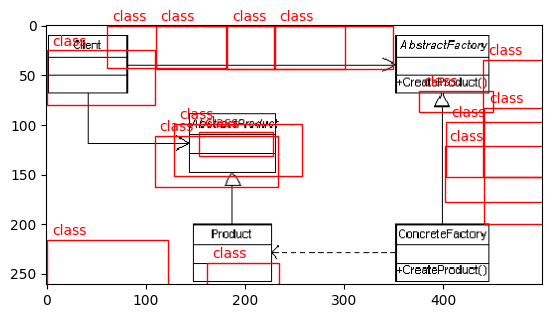



tensor([  0.5432,  24.7877, 109.6292,  79.3170]) tensor(0.0916) class
tensor([109.9685,   0.0000, 228.9461,  43.6368]) tensor(0.0908) class
tensor([182.0668,   0.0000, 300.8335,  43.6395]) tensor(0.0908) class
tensor([229.9874,   0.0000, 349.0630,  43.6904]) tensor(0.0896) class
tensor([161.8247, 238.6144, 233.8634, 261.0000]) tensor(0.0889) class
tensor([440.1842,  34.5673, 500.0000, 152.1407]) tensor(0.0841) class
tensor([  0.4340, 215.9212, 122.8188, 260.7278]) tensor(0.0829) class
tensor([128.4796,  98.5944, 257.2694, 151.5598]) tensor(0.0821) class
tensor([441.0238,  82.3119, 500.0000, 200.1618]) tensor(0.0815) class
tensor([109.0183, 111.2615, 232.8290, 162.1522]) tensor(0.0814) class
tensor([ 61.3068,   0.0000, 180.9873,  42.8056]) tensor(0.0814) class
tensor([401.1306, 121.2156, 500.0000, 177.2894]) tensor(0.0814) class
tensor([153.9104, 107.2428, 228.6806, 130.9513]) tensor(0.0814) class
tensor([375.1802,  65.3560, 449.8066,  86.8638]) tensor(0.0807) class
tensor([402.6770, 

In [ ]:
import numpy as np
image=utils.read_image('/content/drive/My Drive/dataset_label/test/AbstractFactoryUML.png')
print("Image Shape: ", image.shape)
predictions = model.predict(image)
labels, boxes, scores = predictions
# Show all the predictions, without filtering
print("Initial predictions, w/o supression of overlapping bbox and accuracy filter")
print("Total number of preictions: ", len(boxes), "\n")
visualize.show_labeled_image(image, boxes, labels)
print("\n\n")

# Filter the predictions, based on the accuracy of predictions
acc_threshold = 0.08
confident_idx = [idx for idx, entry in enumerate(scores) if entry >= acc_threshold]

labels = [labels[idx] for idx in confident_idx]
boxes, scores = boxes[confident_idx], scores[confident_idx]

print("Filtered predictions after threshodling, i.e, accuracy > 0.25.")
print("Total number of preictions: ", len(boxes), "\n")
visualize.show_labeled_image(image, boxes, labels)
print("\n")
for category, pred, confidence in zip(labels, boxes, scores):
  print(pred, confidence, category)
# print(labels)



# OpenCV

## Rectangle Detection

Problemi :
- detection di quello esterno non va bene....
aspect ratio non uso openCV ---> RISOLTO

- frecce rilevate...

Number of contours detected: 953


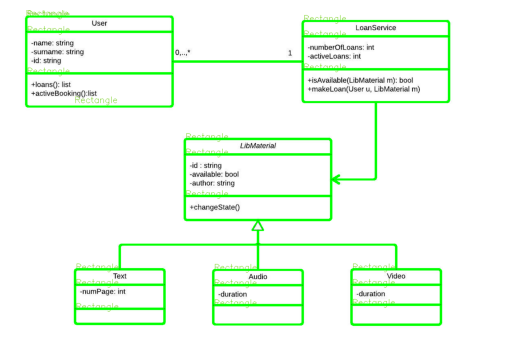

Number of rectangles found: 20


In [ ]:
img = cv2.imread('/content/drive/MyDrive/UML/class.jpg')
rectangle_count = 0
height, width, _ = img.shape
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,50,255,0)
contours,hierarchy = cv2.findContours(thresh, 1, 2)  #-> modifico il secondo valore per selezionare contorni diversi
print("Number of contours detected:", len(contours))

for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ratio = float(w) / h
    if ratio >= 0.9 and ratio <= 1.1:
        continue  # Salta i quadrati
    if w < 20 or h < 20:  #w e h espressi in pixel
        continue  # Salta i rettangoli piccoli
    if w>=width or h>=height:
        continue

    rectangle_count += 1
    cv2.putText(img, 'Rectangle', (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 200, 100), 1)
    img = cv2.drawContours(img, [cnt], -1, (0, 255, 0), 2)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.axis('off')  # Rimuove gli assi dell'immagine
plt.show()
print("Number of rectangles found:", rectangle_count)



## Text extraction

In [ ]:
pip install pytesseract
!apt-get install tesseract-ocr
!pip install pytesseract
pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2
import pytesseract

In [ ]:
img = cv2.imread('/content/drive/MyDrive/UML/class2.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
extracted_text = pytesseract.image_to_string(gray)


In [ ]:
print(extracted_text)


Bank Account

Current Account Saving Account Credit Account

 

 

